# Imports:

In [1]:
import numpy as np
np.set_printoptions(precision=3)

from matplotlib.ticker import FormatStrFormatter
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from matplotlib.legend import Legend

from utils import *


# Figure Formats:

In [2]:
%matplotlib inline

params = {'legend.fontsize': 13,#'x-large',
          'figure.figsize': (7.2, 4.45),#(6, 4.5),
         'axes.labelsize':17,#'xx-large',
         'axes.titlesize':16,#'xx-large',
         'xtick.labelsize':16,#'xx-large',
         'ytick.labelsize':16,#'xx-large',
         'font.size':15,
         'mathtext.fontset': 'stix',
         'font.family': 'STIXGeneral',
         # 'font.family': ['serif'],
         # 'font.sans-serif' : 'Computer Modern Roman',
         'grid.color': '#c1c1c1',
         'text.usetex' : 'False', # set True and see if it works for your LaTeX installation
         'legend.framealpha' : '1.0',
         'lines.markersize': 6,#'7.0',
         'lines.markeredgewidth': '0.5'}

    
pylab.rcParams.update(params)


colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
shapes = ['X','o', 'd', 'v', '^', '<', '>', 'P', '8', 's', 'p', '*', 'h', 'H', 'D']

# Load Trajectories to Ram:

In [3]:
file_path = 'traj_data.h5'
traj_list = get_traj_list(file_path)

print(f'{len(traj_list)} trajectories')

200 trajectories


In [4]:
#get the "recording" frame rate
FPS = len(traj_list[0]) / 4.0
print(f'{FPS} fps')

37.75 fps


# Vizualizations:

###### xy plane:

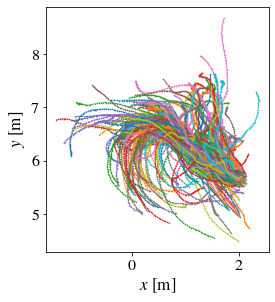

In [5]:
fig, ax = plot_traj_xy(traj_list,min_len=5, shape='o-', lw=0.5)
plt.tight_layout()

###### xz plane:

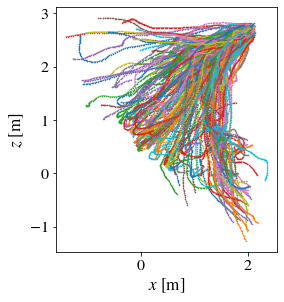

In [6]:
from utils import plot_traj_xz

fig, ax = plot_traj_xz(traj_list,min_len=5, shape='o-', lw=0.5)
plt.tight_layout()

###### yz plane:

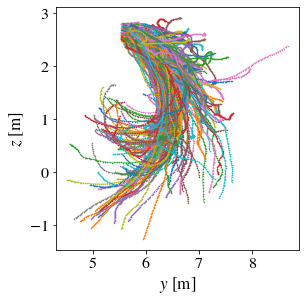

In [7]:
from utils import plot_traj_yz

fig, ax = plot_traj_yz(traj_list,min_len=5, shape='o-', lw=0.5)
plt.tight_layout()

###### in 3D

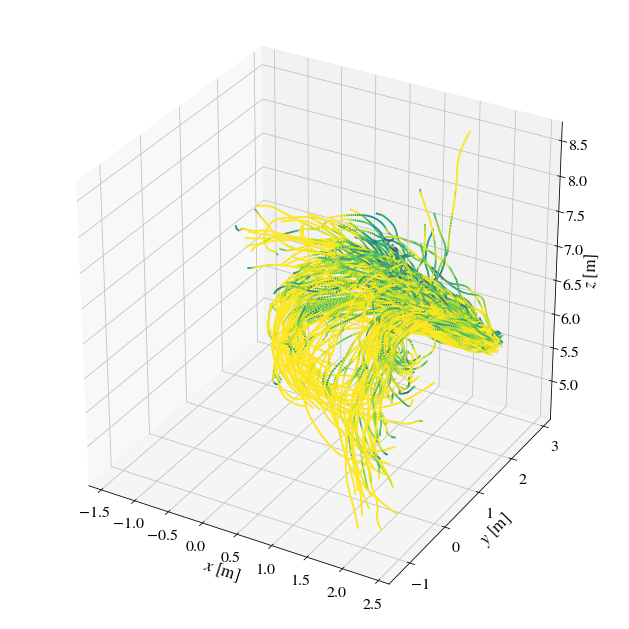

In [8]:
from utils import plot_3D_quiver


fig, ax = plot_3D_quiver(traj_list, 1.0, subtract_mean = False, FPS = FPS, size_factor = 2.0)
# , aspect = 'equal') - # removed due to some bug in matplotlib 3.1 

fig.set_size_inches(9,9)
plt.tight_layout()



## Global Velocity Statistics:

### mean velocity and velocity moments:

In [9]:
from utils import get_mean_velocity, get_vel_p_moment



# mean velocity:
U = get_mean_velocity(traj_list)
print(f' Mean velocity vector = {U} [m/s]')


# central 2nd moment
p = 2
u2 = get_vel_p_moment(traj_list, p)
print(f'{p} order moment = {u2}') 


# turbulent kinetic energy
tke = np.sum(u2) * 0.5
print(f'TKE = {tke:.3f} [m/s]')

 Mean velocity vector = [-0.321  0.148 -0.467] [m/s]
2 order moment = [0.219 0.265 0.188]
TKE = 0.336 [m/s]


### velocity PDFs :

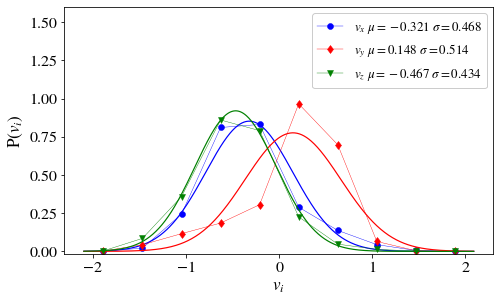

In [10]:
from utils import plot_vel_pdfs

fig, ax = plot_vel_pdfs(traj_list, fit_gaussian=True, bins=10, bin_range=None)

ax.set_ylim(-0.02,1.6)
plt.tight_layout()

## Lagrangian 2nd order structure function:

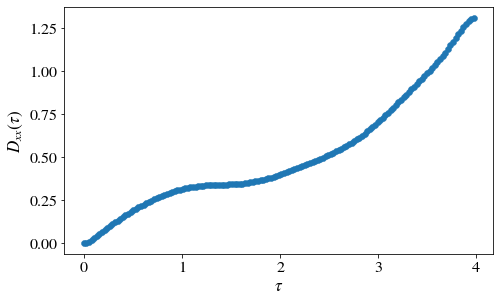

In [11]:
from utils import plot_Dii

fig, ax, time, D_xx = plot_Dii(traj_list, FPS = FPS, axis = 0)
plt.tight_layout()